<h1>MAC Waves Finite Volume/Fourier Hybrid Model - with Full Viscosity</h1>
<p>By Nicholas Knezek<br>
March 2015</p>

<h2> Governing Equations:</h2>
$$
\frac{d\vec{u}}{dt} = 
- (\vec{u}\cdot\nabla)\vec{u}
- \nabla P 
+ \nabla\cdot T_m
+ E \nabla ^2 \vec{u}
- 2(cos\theta \hat{r}) \times \vec{u} 
+ \omega_g^2 \delta r
$$

$$
\frac{d\vec{B}}{dt} = 
\nabla \times (\vec{u} \times \vec{B})
+ \frac{E}{Pr_{m}} \nabla ^2 \vec{B}
$$

$$ \nabla \cdot \vec{u} = 0 $$ 
$$ \nabla \cdot \vec{B} = 0 $$ 

<h3>Boundary Conditions:</h3>
<h4>Free-Slip Velocity Boundary Conditions</h4>
$$ \begin{array}{ccc}
u_r = 0 & \frac{\partial}{\partial r}(r^2 u_\theta) = 0  &  \frac{\partial}{\partial r}(r^2 u_\phi) = 0  
\end{array}$$
<h4>Psuedo-Vacuum Magnetic Boundary Conditions</h4>
$$ \begin{array}{ccc}
\frac{\partial}{\partial r}(r^2 b_r) = 0 &  b_\theta = 0  &  b_\phi = 0
\end{array}$$
<h4>Pressure Continuity (no background radial acceleration</h4>
$$ \frac{\partial P}{\partial r} = 0 $$


<h2>Model Formulation</h2>
<p>Spherical Coordinate System $(r,\theta,\phi)$<br>
$N_k$ points in $r$-direction <br>
$N_l$ points in $\theta$-direction<br>
Fourier Decomposition in $\phi$-direction <br>
Values at Center of Cells
</p>

<h3> Wave Assumption </h3>
$$ P, \vec{u}, \vec{b} = Ce^{(im\phi + \lambda t)} $$

<h3> Linearized Fields</h3>
$$ \vec{u} = u_r\hat{r} + u_{\theta}\hat{\theta} + (U_0 + u_{\phi})\hat{\phi} $$
$$ \vec{B} = (B_0 + b_r)\hat{r} + b_{\theta}\hat{\theta} + b_{\phi}\hat{\phi} $$

<h3> Operators </h3>
$$\begin{array}{cc}
D_r \Psi =  &  
\left(\frac{r_+^2/r^2}{2\Delta r}\right)\Psi^{k+1} + \left(\frac{-r_{-}^2/r^2}{2\Delta r}\right)\Psi^{k-1} + \left(\frac{-sin\theta_+}{4r\sin\theta}\right)\Psi^{l+1} + \left(\frac{-sin\theta_-}{4r\sin\theta}\right)\Psi^{l-1} + \left(\frac{-sin\theta_+-sin\theta_-}{4r\sin\theta}\right)\Psi  \\
D_\theta \Psi = & 
\left(\frac{sin\theta_+/\sin\theta}{ 2r\Delta\theta}\right)\Psi^{l+1} + \left(\frac{-sin\theta_-/\sin\theta}{ 2r\Delta\theta}\right)\Psi^{l-1} + \left(\frac{(sin\theta_+ - \sin\theta_-)/\sin\theta}{2r\Delta\theta}- \frac{cos\theta}{rsin\theta}\right)\Psi  \\
D_\phi \Psi= & 
\left(\frac{im}{rsin\theta} \right) \Psi \\
d_rA = &
\left(\frac{r_+^2/r^2}{2\Delta r}\right)A^{k+1} + \left(\frac{-r_{-}^2/r^2}{2\Delta r}\right)A^{k-1} + \left(\frac{1}{r}\right)A  \\
d_\theta A = &
\left(\frac{sin\theta_+/\sin\theta}{ 2r\Delta\theta}\right)A^{l+1} + \left(\frac{-sin\theta_-/\sin\theta}{ 2r\Delta\theta}\right)A^{l-1} + \left(\frac{(sin\theta_+ - \sin\theta_-)/\sin\theta}{2r\Delta\theta} \right) A  \\
d_\phi A = &
\left(\frac{im}{rsin\theta} \right) A \\
D^2_3 A = &
\left(\frac{r_+^2/r^2}{\Delta r^2}\right)A^{k+1} + \left(\frac{r_{-}^2/r^2}{\Delta r^2}\right)A^{k-1} + \left(\frac{sin\theta_+/\sin\theta}{ r^2\Delta\theta^2}\right)A^{l+1} + \left(\frac{sin\theta_-/\sin\theta}{r^2\Delta\theta^2}\right)A^{l-1} + \left( -\frac{(r_+^2 + r_-^2)/r^2}{\Delta r^2} - \frac{(sin\theta_+ + sin\theta_-)/sin\theta}{r^2\Delta\theta^2} - \frac{m^2}{r^2 sin^2\theta} \right) A 
\end{array}$$

<h3>Equations in Operator Form</h3>
$$\begin{array}{ccccccc}
\lambda u_r &=& &  - D_r P  &  + \left(d_r B_0 b_r + d_\theta B_0 b_\theta + d_\phi B_0 b_\phi \right)  &  +  E\left(D^2_3 u_r - \frac{1}{r}d_\theta u_\theta - \frac{1}{r}d_\phi u_\phi \right)  &  - \omega_g^2 \delta r   \\
\lambda u_\theta &=& &  - D_\theta P  &  + \left(d_r B_0 b_\theta - d_\theta B_0 b_r \right)  &  + E\left(D^2_3 u_\theta + \frac{1}{r} d_\theta u_r - \frac{cot\theta}{r} u_\phi \right)  &  + 2cos\theta u_\phi  \\
\lambda u_\phi &=&  -d_\phi U_0 u_\phi  &  - D_\phi P  &  + \left( d_r B_0 b_\phi - d_\phi B_0 b_r \right)  &  + E\left( D^2_3 u_\phi + \frac{1}{r} d_\phi u_r + \frac{cot\theta}{r} d_\phi u_\theta \right)  &  -2cos\theta u_\theta \\
\lambda b_r &=& - d_\phi U_0 b_r & & \left( -d_\theta B_0 u_\theta - d_\phi B_0 u_\phi \right)  &  + \frac{E}{Pr_m}\left(D^2_3 b_r - \frac{1}{r} d_\theta b_\theta - \frac{1}{r} d_\phi b_\phi \right) &  \\
\lambda b_\theta &=& - d_\phi U_0 b_\theta & & d_r B_0 u_\theta  &  + \frac{E}{Pr_m}\left(D^2_3 b_\theta + \frac{1}{r} d_\theta b_r - \frac{cot\theta}{r} d_\phi b_\phi \right) &   \\
\lambda b_\phi &=& & & \left(d_r B_0 u_\phi - d_r U_0 b_r + d_\theta U_0 b_\theta \right)  &  + \frac{E}{Pr_m}\left(D^2_3 b_\phi + \frac{1}{r} d_\phi b_r + \frac{cot\theta}{r} d_\phi b_\theta \right) &   \\
0 &=& d_r u_r  &  + d_\theta u_\theta  &  + d_\phi u_\phi & & & \\
\lambda \delta r &=& u_r & & &
\end{array}$$

In [28]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as LA
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import matplotlib as mpl
import MAC_functions_conducting_core as mf
import MAC_plotting as mplt
from numpy import sin
from numpy import cos

import MAC_logging as mlog
import sys
from datetime import datetime
import cPickle as pkl
import os

%matplotlib inline
reload(mf)
reload(mplt)

<module 'MAC_plotting' from 'MAC_plotting.pyc'>

In [29]:
######################################################################
##########  Define Parameters   ######################################
######################################################################

######################################################################
#### Edit These: ####

# mode to simulate
m = 0

# Size of grid
Nk = 3
Nl = 10
Nm = 1

# Set up variables to use
model_variables = ('ur','uth','uph','br','bth','bph','p','r_disp')
boundary_variables = ('ur','uth','uph','br','bth','bph','p')

# Physical Constants
R = 3480e3 # Outer core radius in m
Omega = 2*np.pi/(24.0*3600.0) # rotation rate in rad/s
rho = 1.e4  # density in kg/m^3
h = 80e3 # layer thickness in m
nu = 1e-4 # momentum diffusivity in m^2/s 
eta = 2. # magnetic diffusivity in m^2/s
mu_0 = 4.*np.pi*10.**-7 # vacuum permeability in (kg*m/(A^2s^2))
g = 10. # Gravity in m/s^2
drho_dr = -1e-1 # density gradient for boussinesq approximation in kg/m^4 (constant gradient in this model)
omega_g = 2*Omega # Buoyancy frequency in rad/s
T1 = 65.0*365.25*24*3600 # Period of first mode in seconds
Bd = (0.446e-2)*(4*np.pi*rho)**0.5*(mu_0/(4*np.pi))**0.5  # Dipole Field constant in Teslas (Bd = Br*cos(theta))
delta_C = np.sqrt(2*nu/(2*np.pi/T1))  # Core magnetic skin depth for first mode

#### End Editable parameters ####
######################################################################

# Calculate Non-Dimensionalized Parameters
t_star = 1/Omega  # seconds
r_star = R  # meters
P_star = rho* r_star**2/t_star**2
B_star = (eta*mu_0*rho/t_star)**0.5
u_star = r_star/t_star
E = nu*t_star/r_star**2
Prm = nu/eta
G = (omega_g*t_star)**2
l1 = 2*np.pi/(T1/t_star)

physical_constants = {'R':R,'Omega':Omega,'rho':rho,'h':h,'nu':nu,'eta':eta,'mu_0':mu_0,'omega_g':omega_g,
                      't_star':t_star,'r_star':r_star,'u_star':u_star,'P_star':P_star,'B_star':B_star,
                      'E':E,'Prm':Prm,'G':G,'delta_C':delta_C}

# Create model parameter vectors
SizeM = len(model_variables)*Nk*Nl+2*len(boundary_variables)*Nl
rmin = (R-h)/r_star
rmax = R/r_star
dr = (rmax-rmin)/(Nk)
r = np.linspace(rmin-dr/2.,rmax+dr/2.,num=Nk+2.) # r value at center of each cell
rm = np.linspace(rmin-dr,rmax,num=Nk+2.) # r value at plus border (top) of cell
rp = np.linspace(rmin,rmax+dr,num=Nk+2.) # r value at minus border (bottom) of cell
dth = np.pi/(Nl)
th = np.linspace(-dth/2.,np.pi+dth/2.,num=Nl+2.) # theta value at center of cell
thm = np.linspace(-dth,np.pi,num=Nl+2.) # theta value at plus border (top) of cell
thp = np.linspace(0,np.pi+dth,num=Nl+2.) # theta value at minus border (bottom) of cell
m_min = m
m_max = m
m_values = range(m_min,m_max+1)

### Set Background Fields
B0 = np.ones((Nk+2,Nl+2))*cos(th)*Bd/B_star
U0 = np.ones((Nk+2,Nl+2))*1e-16

model_parameters = {'Nk':Nk,'Nl':Nl,'Nm':Nm,'SizeM':SizeM,
                    'dr':dr,'r':r,'rm':rm,'rp':rp,
                    'dth':dth,'th':th,'thm':thm,'thp':thp,
                    'm_values':m_values,
                    'B0':B0, 'U0':U0
                   }

print '\nMAC model, m={0}, Nk={1}, Nl={2}'.format(m,Nk,Nl)
print ''
print 'Physical Parameters'
print 'Omega = {0:.2e} rad/s'.format(Omega)
print 'R = {0} km'.format(R*1e-3)
print 'h = {0} km'.format(h*1e-3)
print 'rho = {0:.2e} kg/m^3'.format(rho)
print 'nu = {0:.2e} m/s^2'.format(nu)
print 'eta = {0:.2e} m/s^2'.format(eta)
print 'omega_g = {0:.2e} rad/s'.format(omega_g)
print 'Bd = {0:.2e} T, {1:.2e} G'.format(Bd, Bd*1e4)
print ''
print 'Non-Dimensional Parameters'
print 't_star = {0:.2e} s'.format(t_star)
print 'r_star = {0:.2e} m'.format(r_star)
print 'u_star = {0:.2e} m/s'.format(u_star)
print 'B_star = {0:.2e} T = {1:.2f} G'.format(B_star,B_star*1e4)
print 'P_star = {0:.2e} Pa = {1:.2f} GPa'.format(P_star,P_star*1e-9)
print ''
print 'G = {0:.2e}'.format(G)
print 'E = {0:.2e}'.format(E)
print 'E/Prm = {0:.2e}'.format(E/Prm)
print 'Bd (non-dim) = {0:.1e}'.format(Bd/B_star)
print 'B0 at equator = {0:.1e}'.format(B0[Nk/2,Nl/2+1])
print 'B0 at pole = {0:.1e}'.format(B0[1,1])
print ''
print 'Grid Spacing Evaluation'
print 'dr^2/dth^2 = {0:.3e}'.format(dr**2/dth**2)
print 'E/dr^2 = {0:.1e}'.format(E/dr**2)
print 'E/dth^2 = {0:.1e}'.format(E/dth**2)
print ''
print 'Momentum Equation Terms'
print 'lambda*u ~ l1 = {0:.2e}'.format(l1)
print 'drP ~ 1/dr = {0:.2e}'.format(1/dr)
print 'E/Prm*drB0b ~ E/Prm*Bd/dr = {0:.2e}'.format(E/Prm*Bd/dr)
print 'E dr^2 u ~ E/dr^2 = {0:.2e}'.format(E/dr**2)  
print '2cos(th)*u ~ 2 = {0:.2e}'.format(2)
print 'Gdelr ~ G*l1 = {0:.2e}'.format(G*l1)
print ''
print 'Lorentz Equation Terms'
print 'lambda*b ~ l1 = {0:.2e}'.format(l1)
print 'dr uxB ~ Bd/dr = {0:.2e}'.format(u_star*Bd/dr)
print 'E/Prm/dr^2 ~ {0:.2e}'.format(E/Prm/dr**2)


MAC model, m=0, Nk=3, Nl=10

Physical Parameters
Omega = 7.27e-05 rad/s
R = 3480.0 km
h = 80.0 km
rho = 1.00e+04 kg/m^3
nu = 1.00e-04 m/s^2
eta = 2.00e+00 m/s^2
omega_g = 1.45e-04 rad/s
Bd = 5.00e-04 T, 5.00e+00 G

Non-Dimensional Parameters
t_star = 1.38e+04 s
r_star = 3.48e+06 m
u_star = 2.53e+02 m/s
B_star = 1.35e-03 T = 13.52 G
P_star = 6.40e+08 Pa = 0.64 GPa

G = 4.00e+00
E = 1.14e-13
E/Prm = 2.27e-09
Bd (non-dim) = 3.7e-01
B0 at equator = -5.8e-02
B0 at pole = 3.7e-01

Grid Spacing Evaluation
dr^2/dth^2 = 5.949e-04
E/dr^2 = 1.9e-09
E/dth^2 = 1.2e-12

Momentum Equation Terms
lambda*u ~ l1 = 4.21e-05
drP ~ 1/dr = 1.31e+02
E/Prm*drB0b ~ E/Prm*Bd/dr = 1.48e-10
E dr^2 u ~ E/dr^2 = 1.93e-09
2cos(th)*u ~ 2 = 2.00e+00
Gdelr ~ G*l1 = 1.68e-04

Lorentz Equation Terms
lambda*b ~ l1 = 4.21e-05
dr uxB ~ Bd/dr = 1.65e+01
E/Prm/dr^2 ~ 3.87e-05


In [30]:
######################################################################
##########  Create Model   ###########################################
######################################################################

model = mf.ModelBraginskyConductingCore(model_variables,boundary_variables,physical_constants,model_parameters)

model.make_A(m)
model.make_M(m)

print 'formed matrices'

formed matrices


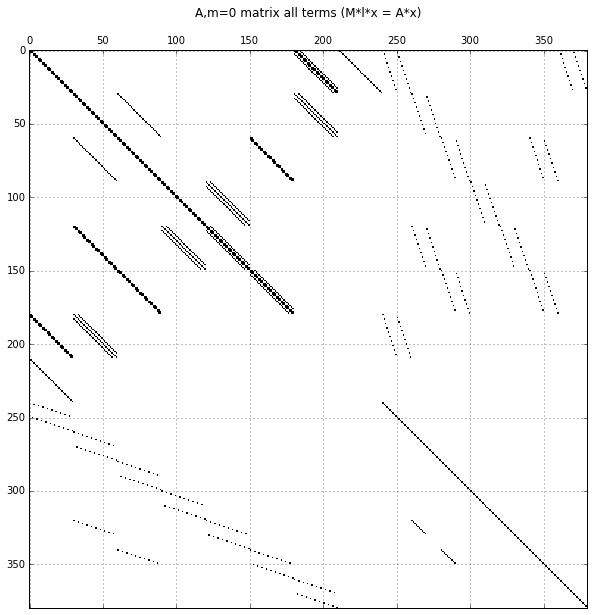

In [34]:
mplt.plot_A(model.A,m)


In [4]:
# Braginsky Solution for starting vector
from scipy.special import clpmn, lpmv
mu = np.linspace(-1,1,Nl)
x = np.linspace(1,0,Nk)
omega = 2*np.pi/(65*365.25*24.*3600.) # Oscillation period for T=1
k_H = np.pi/h

n=2 # n=2 for T1, n=4 for T2

# Constants
upha = 1.
utha = upha*k_H**2*Bd**2/(2*Omega*omega)
ura = utha*n*(n+1)/(k_H*R)
bpha = upha*k_H*Bd/omega
btha = bpha*k_H**2*Bd**2/(2*Omega*omega)
bra = btha/(k_H*R)

# Solution Vectors
uph = (upha*(np.ones((len(x),len(mu))).T*(1+cos(np.pi*x))).T*(lpmv(1,n,mu)/mu)).T
uph[np.isnan(uph)] = 0
uth = (utha*(np.ones((len(x),len(mu))).T*(-1j*cos(np.pi*x))).T*lpmv(1,n,mu)).T
ur =  (ura*(np.ones((len(x),len(mu))).T*(-1j*sin(np.pi*x))).T*lpmv(0,n,mu)).T
bph = (bpha*(np.ones((len(x),len(mu))).T*(1j*sin(np.pi*x))).T*lpmv(1,n,mu)).T
bth = (btha*(np.ones((len(x),len(mu))).T*(sin(np.pi*x))).T*lpmv(1,n,mu)*mu).T
br = (bra*(np.ones((len(x),len(mu))).T*(-cos(np.pi*x))).T*np.append(np.diff(lpmv(1,n,mu)*mu),0)).T
p = (np.zeros_like(br)).T
r_disp = (np.zeros_like(br)).T
bound = np.zeros((2,Nl))

# Create starting vector
variables = [ur,uth,uph,br,bth,bph,p,r_disp]
boundaries = [bound,bound,bound,bound,bound,bound,bound]
v0 = model.create_vector(variables,boundaries)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


In [11]:
### Search Parameter Space of Eigenvalues, save values and plot
from datetime import datetime
import cPickle as pkl
import MAC_plotting as mplt
import os

def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(d):
        os.makedirs(d)

### Parameters to set for automated run####
sigmas = 10.**np.linspace(-5,-7,40)*1j
# sigmas = [7.9e-5*1j]
num_eigs =10
max_iter = 5000
which = 'LI'
dir_name = './output/automated_run_{0}_{1}/'.format(datetime.today().date(),datetime.today().time())
####

ensure_dir(dir_name)

### Create log file ####
log = open(dir_name+'log.txt','a')
log.write('Automated Run began at {0}\n'.format(datetime.today()))
log.write('which eigenvalues to search for = {0}\n'.format(which))
log.write('Number of eigenvalues to return per sigma = {0}\n'.format(num_eigs))
log.write('sigmas requested:\n')
for sigma in sigmas:
    log.write(str(sigma)+'\n')
log.write('\nMAC model, m={0}, Nk={1}, Nl={2}\n'.format(m,Nk,Nl))
log.write('\nPhysical Parameters\n')
log.write('Omega = {0:.2e} rad/s\n'.format(Omega))
log.write('R = {0} km\n'.format(R*1e-3))
log.write('h = {0} km\n'.format(h*1e-3))
log.write('rho = {0:.2e} kg/m^3\n'.format(rho))
log.write('nu = {0:.2e} m/s^2\n'.format(nu))
log.write('eta = {0:.2e} m/s^2\n'.format(eta))
log.write('omega_g = {0:.2e} rad/s\n'.format(omega_g))
log.write('Bd = {0:.2e} T, {1:.2e} G\n'.format(Bd, Bd*1e4))
log.write('\nNon-Dimensional Parameters\n')
log.write('t_star = {0:.2e} s\n'.format(t_star))
log.write('r_star = {0:.2e} m\n'.format(r_star))
log.write('u_star = {0:.2e} m/s\n'.format(u_star))
log.write('B_star = {0:.2e} T = {1:.2f} G\n'.format(B_star,B_star*1e4))
log.write('P_star = {0:.2e} Pa = {1:.2f} GPa\n'.format(P_star,P_star*1e-9))
log.write('\n\nlog notes:\n')
found_vecs = {}
found_vals = {}
for sigma in sigmas:
    try:
        found_vals[sigma],eigenvectors_tmp = LA.eigs(A_matrices[m], k=num_eigs, M=M_matrices[m], v0=v0,
                                             sigma=sigma, return_eigenvectors=True, which=which, maxiter=max_iter)
        eigenvectors_list_temp = []
        for ind in range(num_eigs):
            eigenvectors_list_temp.append(eigenvectors_tmp[:,ind])
        found_vecs[sigma] = np.array(eigenvectors_list_temp)
        for ind in range(num_eigs):
            mplt.plot_pcolor_rth(model,found_vals[sigma][ind],found_vecs[sigma][ind],dir_name,'wanted_'+str(sigma)+'val_'+str(found_vals[sigma][ind]))
        print '{0} eigenvalues found for sigma = {1}\n'.format(num_eigs,sigma)
        log.write('{0} eigenvalues found for sigma = {1}\n'.format(num_eigs,sigma))
    except:
        print 'no convergence for sigma={0}, {1} iterations\n'.format(sigma,max_iter)
        log.write('no convergence for sigma={0}, {1} iterations\n'.format(sigma,max_iter))

pkl.dump({'found_vals':found_vals,'found_vecs':found_vecs},open(dir_name+'data.p', 'wb'))
log.close()

no convergence for sigma=1e-05j, 5000 iterations

no convergence for sigma=8.88623816274e-06j, 5000 iterations

no convergence for sigma=7.8965228685e-06j, 5000 iterations

no convergence for sigma=7.0170382867e-06j, 5000 iterations

no convergence for sigma=6.23550734127e-06j, 5000 iterations

no convergence for sigma=5.54102033001e-06j, 5000 iterations

no convergence for sigma=4.92388263171e-06j, 5000 iterations

no convergence for sigma=4.37547937507e-06j, 5000 iterations

no convergence for sigma=3.88815518031e-06j, 5000 iterations

no convergence for sigma=3.45510729459e-06j, 5000 iterations

no convergence for sigma=3.07029062976e-06j, 5000 iterations

no convergence for sigma=2.72833337649e-06j, 5000 iterations

no convergence for sigma=2.42446201708e-06j, 5000 iterations

no convergence for sigma=2.15443469003e-06j, 5000 iterations

no convergence for sigma=1.91448197617e-06j, 5000 iterations

no convergence for sigma=1.70125427985e-06j, 5000 iterations

no convergence for sig

In [6]:
for ind, sigma in enumerate([5,6,7,6]):
    print ind, ind


0 0
1 1
2 2
3 3


In [9]:
######################################################################
##########  Solve Eigenvalue Equation   ##############################
######################################################################
print '\nsolving eigenvalue equation'
eigenvectors = {}
eigenvalues = {}
starting_sigma = l1*1j
num_eigs_to_find = 10

# Eigenvalue to find
for m in m_values:
    eigenvectors_list_temp = []
    tol = 0.
    eigenvalues[m],eigenvectors_tmp = LA.eigs(A_matrices[m], k=num_eigs_to_find, M=M_matrices[m], v0=v0,
                                             sigma=starting_sigma, return_eigenvectors=True, tol=tol, which='LI', maxiter=1000)
    for ind in range(num_eigs_to_find):
        eigenvectors_list_temp.append(eigenvectors_tmp[:,ind])
    eigenvectors[m] = np.array(eigenvectors_list_temp)
        
    print ('Starting sigma requested for m='+str(m)
           +' : ' + str(starting_sigma) +', '+ str(len(eigenvalues[m]))+' eigenvalues found')
    print 'Eigenvalues Found:'
    for ind,val in enumerate(eigenvalues[m]):
        print '{0}: {1:.4e} , T={2:.1f}yr'.format(ind,val,t_star*2*np.pi/abs(val.imag)/(24.*3600.*365.25))


solving eigenvalue equation
Starting sigma requested for m=0 : 4.21207813405e-05j, 10 eigenvalues found
Eigenvalues Found:
0: -2.5323e-05-1.6913e-04j , T=16.2yr
1: -2.5323e-05+1.6913e-04j , T=16.2yr
2: -8.2695e-05-1.0460e-04j , T=26.2yr
3: -8.2695e-05+1.0460e-04j , T=26.2yr
4: -8.5534e-05-1.0011e-04j , T=27.3yr
5: -8.5534e-05+1.0011e-04j , T=27.3yr
6: -8.2611e-05-1.2374e-04j , T=22.1yr
7: -8.2611e-05+1.2374e-04j , T=22.1yr
8: -8.5405e-05-1.2395e-04j , T=22.1yr
9: -8.5405e-05+1.2395e-04j , T=22.1yr


In [6]:
def center_is_big(model,vec,var='uth',Nbound=8):
    data = model.getVariable(vec,var)[0]
    bound1 = Nl/Nbound
    bound2 = (Nl*(Nbound-1))/Nbound
    center = data[:,bound1:bound2-1]
    edges = np.concatenate((data[:,0:bound1-1],data[:,bound2:]),axis=1)
    return max(max(abs(x)) for x in edges)*0.5 < max(max(abs(x)) for x in center)

def filter_small_decay(model,eigenvalues):
    indices = []
    for ind in range(len(eigenvalues)):
        if abs(eigenvalues[ind].imag)>abs(eigenvalues[ind].real):
            indices.append(ind)
    return indices

def filter_center_big(model,eigenvectors,var='uth',Nbound=8):
    indices = []
    for ind in range(len(eigenvectors)):
        vec = eigenvectors[ind]
        if center_is_big(model,vec,var,Nbound=Nbound):
            indices.append(ind)
    return indices
filtered_inds = filter_center_big(model,eigenvectors[m],var='uth',Nbound=10)
filtered_eigenvectors1 = eigenvectors[m][filtered_inds]
filtered_eigenvalues1 = eigenvalues[m][filtered_inds]
non_decay_inds = filter_small_decay(model,filtered_eigenvalues1)
filtered_eigenvectors = filtered_eigenvectors1[non_decay_inds]
filtered_eigenvalues = filtered_eigenvalues1[non_decay_inds]
# print filtered_eigenvectors
for i in filtered_inds:
    print '{0}: {1:.3e}, T={2:.1f}yr'.format(i,eigenvalues[m][i],(t_star/abs(eigenvalues[m][i].imag/(2*np.pi)))/(24.*3600.*365.25))

0: -2.532e-05-1.691e-04j, T=16.2yr
1: -2.532e-05+1.691e-04j, T=16.2yr
2: -8.269e-05-1.046e-04j, T=26.2yr
3: -8.269e-05+1.046e-04j, T=26.2yr
6: -8.261e-05-1.237e-04j, T=22.1yr
7: -8.261e-05+1.237e-04j, T=22.1yr


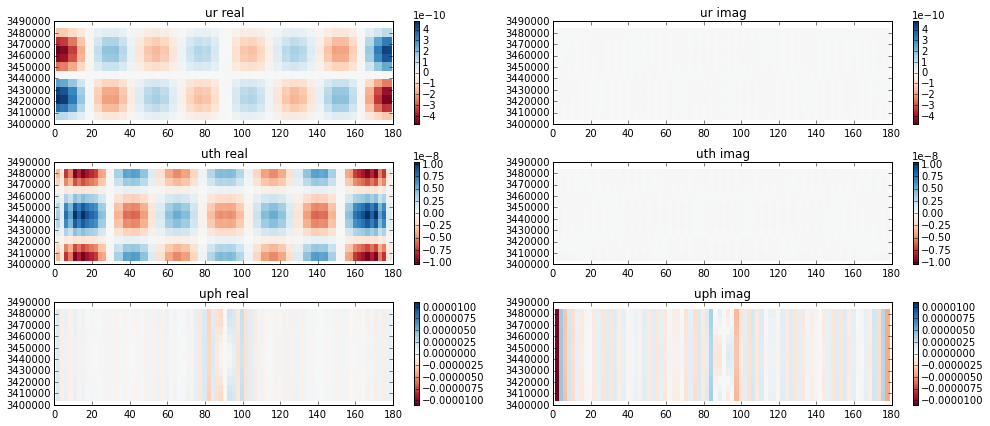

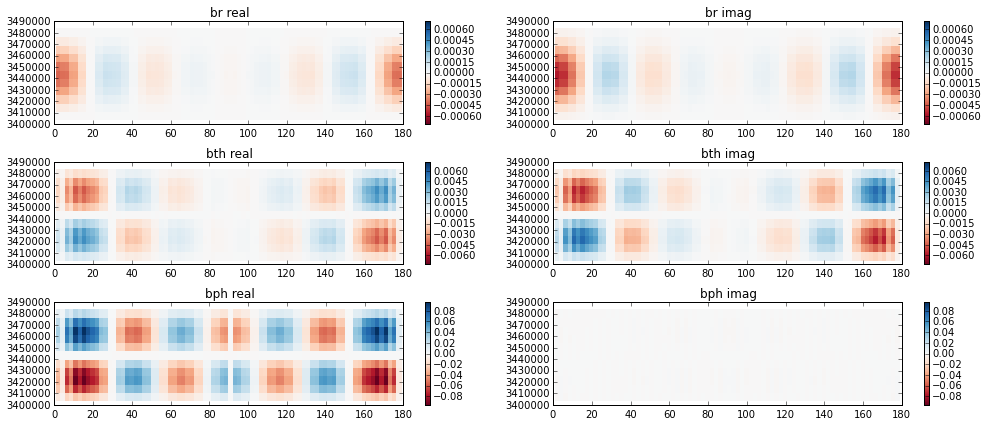

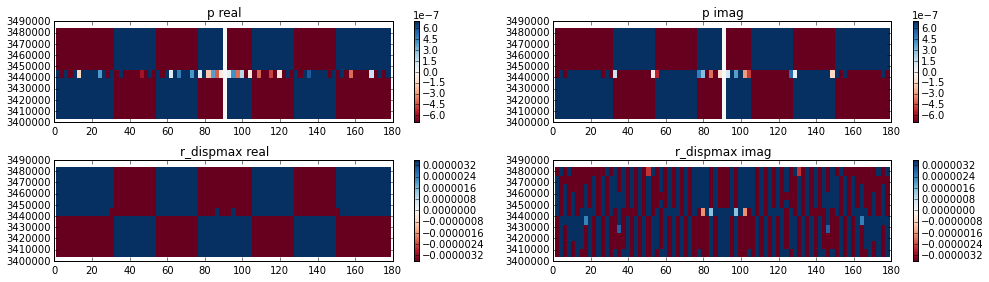

In [7]:
vectest1 = eigenvectors[0][2]

rpl = r[1:]*R
thpl = th[1:-1]*180./np.pi

fig = plt.figure(figsize=(14,6))
ur,urtop,urbottom = model.getVariable(vectest1,'ur')
uth,uthtop,uthbottom = model.getVariable(vectest1,'uth')
uph,uphtop,uphbottom = model.getVariable(vectest1,'uph')

urmax = np.amax(abs(ur))
plt.subplot(3,2,1)
plt.pcolor(thpl,rpl,ur.real, cmap='RdBu',vmin=-urmax, vmax=urmax)
plt.title('ur real')
plt.colorbar()
plt.subplot(3,2,2)
plt.pcolor(thpl,rpl,ur.imag, cmap='RdBu',vmin=-urmax, vmax=urmax)
plt.title('ur imag')
plt.colorbar()

uthmax = np.amax(abs(uth))
plt.subplot(3,2,3)
plt.pcolor(thpl,rpl,uth.real, cmap='RdBu',vmin=-uthmax, vmax=uthmax)
plt.title('uth real')
plt.colorbar()
plt.subplot(3,2,4)
plt.pcolor(thpl,rpl,uth.imag, cmap='RdBu',vmin=-uthmax, vmax=uthmax)
plt.title('uth imag')
plt.colorbar()

uphmax = np.amax(abs(uph))
plt.subplot(3,2,5)
plt.pcolor(thpl,rpl,uph.real, cmap='RdBu',vmin=-uphmax, vmax=uphmax)
plt.title('uph real')
plt.colorbar()
plt.subplot(3,2,6)
plt.pcolor(thpl,rpl,uph.imag, cmap='RdBu',vmin=-uphmax, vmax=uphmax)
plt.title('uph imag')
plt.colorbar()

fig.tight_layout()


fig = plt.figure(figsize=(14,6))
br,brtop,brbottom = model.getVariable(vectest1,'br')
bth,bthtop,bthbottom = model.getVariable(vectest1,'bth')
bph,bphtop,bphbottom = model.getVariable(vectest1,'bph')

brmax = np.amax(abs(br))
plt.subplot(3,2,1)
plt.pcolor(thpl,rpl,br.real, cmap='RdBu',vmin=-brmax, vmax=brmax)
plt.title('br real')
plt.colorbar()
plt.subplot(3,2,2)
plt.pcolor(thpl,rpl,br.imag, cmap='RdBu',vmin=-brmax, vmax=brmax)
plt.title('br imag')
plt.colorbar()

bthmax = np.amax(abs(bth))
plt.subplot(3,2,3)
plt.pcolor(thpl,rpl,bth.real, cmap='RdBu',vmin=-bthmax, vmax=bthmax)
plt.title('bth real')
plt.colorbar()
plt.subplot(3,2,4)
plt.pcolor(thpl,rpl,bth.imag, cmap='RdBu',vmin=-bthmax, vmax=bthmax)
plt.title('bth imag')
plt.colorbar()

bphmax = np.amax(abs(bph))
plt.subplot(3,2,5)
plt.pcolor(thpl,rpl,bph.real, cmap='RdBu',vmin=-bphmax, vmax=bphmax)
plt.title('bph real')
plt.colorbar()
plt.subplot(3,2,6)
plt.pcolor(thpl,rpl,bph.imag, cmap='RdBu',vmin=-bphmax, vmax=bphmax)
plt.title('bph imag')
plt.colorbar()
fig.tight_layout()


fig = plt.figure(figsize=(14,4))
p,ptop,pbottom = model.getVariable(vectest1,'p')
r_disp = model.getVariable(vectest1,'r_disp')

pmax = np.amax(abs(p))
plt.subplot(2,2,1)
plt.pcolor(thpl,rpl,bth.real, cmap='RdBu',vmin=-pmax, vmax=pmax)
plt.title('p real')
plt.colorbar()
plt.subplot(2,2,2)
plt.pcolor(thpl,rpl,bth.imag, cmap='RdBu',vmin=-pmax, vmax=pmax)
plt.title('p imag')
plt.colorbar()

r_dispmax = np.amax(abs(r_disp))
plt.subplot(2,2,3)
plt.pcolor(thpl,rpl,bph.real, cmap='RdBu',vmin=-r_dispmax, vmax=r_dispmax)
plt.title('r_dispmax real')
plt.colorbar()
plt.subplot(2,2,4)
plt.pcolor(thpl,rpl,bph.imag, cmap='RdBu',vmin=-r_dispmax, vmax=r_dispmax)
plt.title('r_dispmax imag')
plt.colorbar()
fig.tight_layout()



plotting


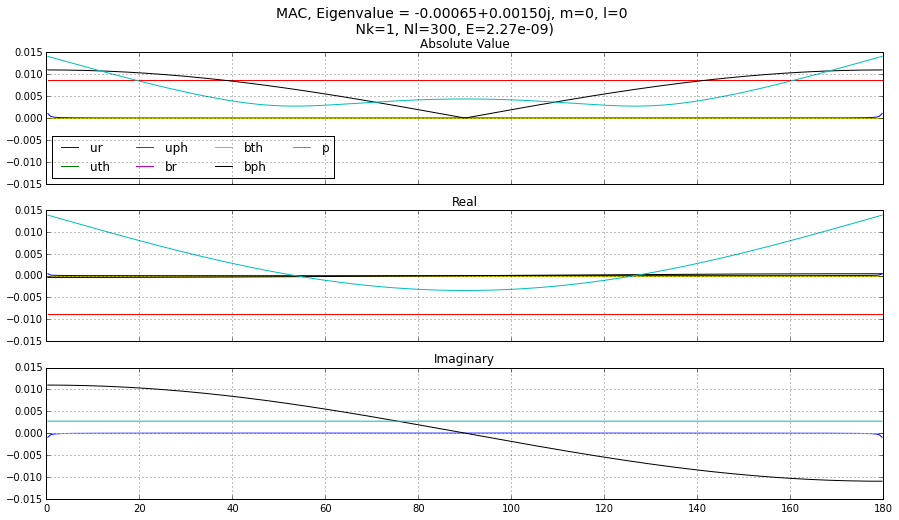

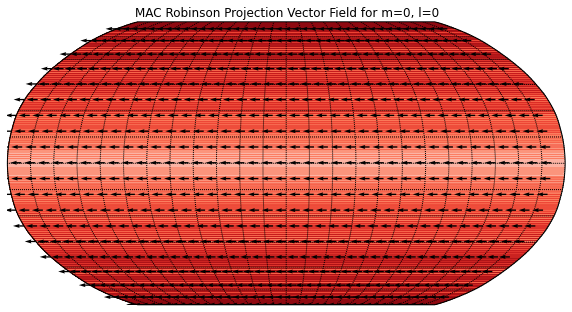

In [19]:
print '\nplotting'
reload(mplt)
to_plot = 0
# mplt.plot_1D(model,filtered_eigenvectors[to_plot],filtered_eigenvalues[to_plot],m,to_plot)
mplt.plot_1D(model,eigenvectors[m][to_plot],eigenvalues[m][to_plot],0,to_plot)
mplt.plot_robinson(model,eigenvectors[m][to_plot],eigenvalues[m][to_plot],0,to_plot)

# for m in m_values:
#     for ind in range(len(filtered_eigenvalues)):
#         mplt.plot_1D(model,filtered_eigenvectors[ind],filtered_eigenvalues[ind],m,ind)
# # plt.clf()

In [10]:
### Make starting vector for iteration ###
vec_0 = {}
for m in m_values:
    l=m
    ur_0 = np.ones((Nk,Nl))*1.e-5
    urBC_0 = np.ones((2,Nl))*1.e-5
    uth_0 = np.ones((Nk,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    uthBC_0 = np.ones((2,Nl))*1.e-5
    uph_0 = np.ones((Nk,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    uphBC_0 = np.ones((2,Nl))*1.e-5
    p_0 = np.ones((Nk,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    pBC_0 = np.ones((2,1))*np.matrix(sp.special.sph_harm(m,l,0.*np.ones_like(th[1:-1]),th[1:-1]))
    variables = [ur_0,uth_0,uph_0,ur_0,uth_0,uph_0,p_0]
    boundaries = [urBC_0,uthBC_0,uphBC_0,urBC_0,uthBC_0,uphBC_0,pBC_0]
    vec_0[m] = model.create_vector(variables,boundaries)


RuntimeError: Incorrect number of variable vectors passed